# 4차 - 미니 프로젝트 실습 (카드소비패턴 분석)

## 1. 데이터 확인
### 1.1 데이터 불러오기

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings(action='ignore')
pd.options.display.float_format = '{:.2f}'.format #지수 없애기
# pd.reset_option('display.float_format')

plt.rc('font', family='NanumBarunGothic')

In [227]:
df1 = pd.read_csv('블록별 성별연령대별 카드소비패턴.csv', encoding='utf-8')
df3 = pd.read_csv('집계구별 일별소비지역별 카드소비패턴.csv', encoding='utf-8')
df4 = pd.read_csv('집계구별 일별시간대별 카드소비패턴.csv', encoding='utf-8')
df5 = pd.read_csv('카드소비 업종코드.csv', encoding='cp949')

In [228]:
df1.head()

,고객주소블록코드(BLOCK_CD),기준년월(YM),서울시민업종코드(UPJONG_CD),성별(GENDER),연령대별(AGE),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR)
0,153611,201901,SS064,M,50대,5,1058400
1,14239,201901,SS090,F,50대,5,2822400
2,225872,201901,SS069,M,30대,60,1948141
3,158041,201901,SS041,M,60대,5,146160
4,360829,201901,SS066,M,50대,45,2787886


In [229]:
df3.head()

,가맹점주소광역시도(SIDO),가맹점주소시군구(SGG),업종대분류(UPJONG_CLASS1),기준일자(YMD),고객주소집계구별(TOT_REG_CD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,서울,서초구,의료,20190107,1112073020006,114912,15
1,경기,안양시,요식유흥,20190122,1120056010010,117936,15
2,서울,서대문구,의료,20190117,1113071020102,326743,35
3,서울,마포구,유통,20190102,1108071040110,33768,5
4,서울,강남구,유통,20190108,1118057010001,63000,15


In [230]:
df4.tail()

,업종대분류(UPJONG_CLASS1),기준일자(YMD),시간대구간(TIME),고객주소집계구별(TOT_REG_CD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
11995,음식료품,20201214,5,1118053020012,12775,5
11996,전자상거래,20201218,2,1115066040704,374563,10
11997,요식유흥,20201217,3,1118054010012,398580,36
11998,음식료품,20201214,1,1105060010008,4088,5
11999,요식유흥,20201211,5,1111058030205,615755,15


In [231]:
df5.tail()

,업종코드(UPJONG_CD),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3)
70,ss084,스포츠/문화/레저,스포츠/문화/레저,스키
71,ss090,교육/학원,학원,입시보습학원
72,ss091,교육/학원,학원,외국어학원
73,ss092,교육/학원,학원,예체능학원
74,ss093,교육/학원,학원,취미/전문학원


In [232]:
# ['기준년도'] 연도 저장
df1['기준년도'] = df1['기준년월(YM)'].astype(str).map(lambda x:x[:4])
df3['기준년도'] = df3['기준일자(YMD)'].astype(str).map(lambda x:x[:4])
df4['기준년도'] = df4['기준일자(YMD)'].astype(str).map(lambda x:x[:4])

In [233]:
# 2020년 데이터
df1 = df1[df1['기준년도']=='2020']
df3 = df3[df3['기준년도']=='2020']
df4 = df4[df4['기준년도']=='2020']

### 1.2 info()로 데이터 타입 확인

In [234]:
print(df1.info())
df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 6000 to 11999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   고객주소블록코드(BLOCK_CD)   6000 non-null   int64 
 1   기준년월(YM)             6000 non-null   int64 
 2   서울시민업종코드(UPJONG_CD)  6000 non-null   object
 3   성별(GENDER)           6000 non-null   object
 4   연령대별(AGE)            6000 non-null   object
 5   카드이용건수계(USECT_CORR)  6000 non-null   int64 
 6   카드이용금액계(AMT_CORR)    6000 non-null   int64 
 7   기준년도                 6000 non-null   object
dtypes: int64(4), object(4)
memory usage: 421.9+ KB
None


,고객주소블록코드(BLOCK_CD),기준년월(YM),서울시민업종코드(UPJONG_CD),성별(GENDER),연령대별(AGE),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR),기준년도
6000,411696,202001,SS008,F,20대,26,444059,2020
6001,211675,202001,SS040,F,30대,66,656635,2020
6002,153447,202001,SS012,F,60대,15,83273,2020
6003,216464,202001,SS008,F,50대,72,749637,2020
6004,16202,202001,SS030,M,40대,5,454790,2020


블록별 성별연령대별 카드소비패턴(df1)
- int : 고객주소블록코드, 기준년월, 카드이용건수계, 카드이용금액계
- obj : 서울시민업종코드, 성별, 연령대별, 기준년도

In [235]:
print(df3.info())
df3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 6000 to 11999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   가맹점주소광역시도(SIDO)       6000 non-null   object
 1   가맹점주소시군구(SGG)         5443 non-null   object
 2   업종대분류(UPJONG_CLASS1)  6000 non-null   object
 3   기준일자(YMD)             6000 non-null   int64 
 4   고객주소집계구별(TOT_REG_CD)  6000 non-null   int64 
 5   카드이용금액계(AMT_CORR)     6000 non-null   int64 
 6   카드이용건수계(USECT_CORR)   6000 non-null   int64 
 7   기준년도                  6000 non-null   object
dtypes: int64(4), object(4)
memory usage: 421.9+ KB
None


,가맹점주소광역시도(SIDO),가맹점주소시군구(SGG),업종대분류(UPJONG_CLASS1),기준일자(YMD),고객주소집계구별(TOT_REG_CD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR),기준년도
6000,서울,양천구,요식유흥,20200103,1116067020303,63875,10,2020
6001,서울,송파구,음식료품,20200101,1124071030004,553515,20,2020
6002,서울,서초구,전자상거래,20200131,1117051010105,612689,5,2020
6003,서울,성동구,요식유흥,20200120,1115057010010,30660,5,2020
6004,서울,중구,전자상거래,20200124,1125072020015,68985,5,2020


집계구별 일별소비지역별 카드소비패턴(df3)
- int : 기준일자, 고객주소집계구별, 카드이용금액계, 카드이용건수계
- obj : 가맹점주소광역시도, 가맹점주소시군구, 업종대분류, 기준년도

In [236]:
print(df4.info())
df4.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 6000 to 11999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   업종대분류(UPJONG_CLASS1)  6000 non-null   object
 1   기준일자(YMD)             6000 non-null   int64 
 2   시간대구간(TIME)           6000 non-null   int64 
 3   고객주소집계구별(TOT_REG_CD)  6000 non-null   int64 
 4   카드이용금액계(AMT_CORR)     6000 non-null   int64 
 5   카드이용건수계(USECT_CORR)   6000 non-null   int64 
 6   기준년도                  6000 non-null   object
dtypes: int64(5), object(2)
memory usage: 375.0+ KB
None


,업종대분류(UPJONG_CLASS1),기준일자(YMD),시간대구간(TIME),고객주소집계구별(TOT_REG_CD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR),기준년도
6000,전자상거래,20200125,3,1120073040302,277555,5,2020
6001,전자상거래,20200126,6,1103057010304,27492,5,2020
6002,주유,20200113,3,1117071090010,655812,10,2020
6003,유통,20200112,3,1102072010303,49312,15,2020
6004,자동차,20200110,4,1103072020007,161476,10,2020


집계구별 일별시간대별 카드소비패턴(df4)
- int : 기준일자, 시간대구간, 고객주소집계구별, 카드이용금액계, 카드이용건수계
- obj : 업종대분류, 기준년도

In [237]:
print(df5.info())
df5.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   업종코드(UPJONG_CD)  75 non-null     object
 1   대분류(CLASS1)      75 non-null     object
 2   중분류(CLASS2)      75 non-null     object
 3   소분류(CLASS3)      75 non-null     object
dtypes: object(4)
memory usage: 2.5+ KB
None


,업종코드(UPJONG_CD),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3)
0,ss001,요식/유흥,한식,한식
1,ss002,요식/유흥,일식/중식/양식,일식
2,ss003,요식/유흥,일식/중식/양식,양식
3,ss004,요식/유흥,일식/중식/양식,중식
4,ss005,요식/유흥,제과/커피/패스트푸드,제과점


카드소비 업종코드(df5)
- int : x
- obj : 업종코드, 대분류, 중분류, 소분류

In [238]:
#df4 = df4.copy()
df4['기준일자(YMD)'] = pd.to_datetime(df4['기준일자(YMD)'], format='%Y%m%d')
df4 = df4.astype({'고객주소집계구별(TOT_REG_CD)' : 'object'})
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 6000 to 11999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   업종대분류(UPJONG_CLASS1)  6000 non-null   object        
 1   기준일자(YMD)             6000 non-null   datetime64[ns]
 2   시간대구간(TIME)           6000 non-null   int64         
 3   고객주소집계구별(TOT_REG_CD)  6000 non-null   object        
 4   카드이용금액계(AMT_CORR)     6000 non-null   int64         
 5   카드이용건수계(USECT_CORR)   6000 non-null   int64         
 6   기준년도                  6000 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 375.0+ KB


In [239]:
df1.drop(['고객주소블록코드(BLOCK_CD)'], axis=1, inplace=True)
df3.drop(['고객주소집계구별(TOT_REG_CD)'], axis=1, inplace=True)
df4.drop(['고객주소집계구별(TOT_REG_CD)'], axis=1, inplace=True)

## 2. 데이터 정제
### 2.1 결측치 처리

In [240]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 6000 to 11999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   기준년월(YM)             6000 non-null   int64 
 1   서울시민업종코드(UPJONG_CD)  6000 non-null   object
 2   성별(GENDER)           6000 non-null   object
 3   연령대별(AGE)            6000 non-null   object
 4   카드이용건수계(USECT_CORR)  6000 non-null   int64 
 5   카드이용금액계(AMT_CORR)    6000 non-null   int64 
 6   기준년도                 6000 non-null   object
dtypes: int64(3), object(4)
memory usage: 375.0+ KB


- 결측치 없음

In [241]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 6000 to 11999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   가맹점주소광역시도(SIDO)       6000 non-null   object
 1   가맹점주소시군구(SGG)         5443 non-null   object
 2   업종대분류(UPJONG_CLASS1)  6000 non-null   object
 3   기준일자(YMD)             6000 non-null   int64 
 4   카드이용금액계(AMT_CORR)     6000 non-null   int64 
 5   카드이용건수계(USECT_CORR)   6000 non-null   int64 
 6   기준년도                  6000 non-null   object
dtypes: int64(3), object(4)
memory usage: 375.0+ KB


- 결측치 있음 : 가맹점주소시군구(SGG)

In [242]:
#결측치가 포함된 행
df3[df3.isnull().any(axis=1)]

,가맹점주소광역시도(SIDO),가맹점주소시군구(SGG),업종대분류(UPJONG_CLASS1),기준일자(YMD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR),기준년도
6022,충북,NaN,요식유흥,20200124,81760,5,2020
6031,경북,NaN,요식유흥,20200131,386827,26,2020
6039,대전,NaN,자동차,20200122,5110,5,2020
6069,대구,NaN,요식유흥,20200129,443548,10,2020
6071,부산,NaN,의료,20200118,558063,5,2020
...,...,...,...,...,...,...,...
11957,경남,NaN,주유,20201209,1119090,15,2020
11958,대구,NaN,유통,20201217,481618,5,2020
11969,전북,NaN,유통,20201204,81760,5,2020
11979,전북,NaN,유통,20201208,113442,15,2020


In [243]:
# df3 결측치 열 삭제
df3.drop(['가맹점주소시군구(SGG)'], axis=1, inplace=True)
df3.head()

,가맹점주소광역시도(SIDO),업종대분류(UPJONG_CLASS1),기준일자(YMD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR),기준년도
6000,서울,요식유흥,20200103,63875,10,2020
6001,서울,음식료품,20200101,553515,20,2020
6002,서울,전자상거래,20200131,612689,5,2020
6003,서울,요식유흥,20200120,30660,5,2020
6004,서울,전자상거래,20200124,68985,5,2020


In [244]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 6000 to 11999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   업종대분류(UPJONG_CLASS1)  6000 non-null   object        
 1   기준일자(YMD)             6000 non-null   datetime64[ns]
 2   시간대구간(TIME)           6000 non-null   int64         
 3   카드이용금액계(AMT_CORR)     6000 non-null   int64         
 4   카드이용건수계(USECT_CORR)   6000 non-null   int64         
 5   기준년도                  6000 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 328.1+ KB


- 결측치 없음

### 2.2 이상치 처리
 - 카테고리 이외의 값이 포함되어 있을 경우 삭제나 치환 등으로 처리
 - 이상치의 범위를 지정하여, 범위를 벗어났을 경우 이상치로 설정(ex. 4분위수 범위, 6sigma 등)
 - 이상치를 삭제하거나 이상치끼리 따로 분석 가능
 - 이상치를 다른 값(최댓값, 최솟값 등)으로 설정해서 데이터의 범위를 제한 가능
 - Binning을 통하여 수치형 데이터를 범주형 데이터로 변경 가능

In [245]:
#df1
print('서울시민업종코드 :\n',df1['서울시민업종코드(UPJONG_CD)'].unique())
print('성별 :\n', df1['성별(GENDER)'].unique())
print('연령대별 :\n', df1['연령대별(AGE)'].unique())

서울시민업종코드 :
 ['SS008' 'SS040' 'SS012' 'SS030' 'SS033' 'SS017' 'SS014' 'SS007' 'SS004'
 'SS066' 'SS016' 'SS021' 'SS013' 'SS069' 'SS019' 'SS068' 'SS015' 'SS064'
 'SS031' 'SS024' 'SS055' 'SS044' 'SS005' 'SS001' 'SS041' 'SS039' 'SS070'
 'SS062' 'SS058' 'SS054' 'SS046' 'SS006' 'SS002' 'SS032' 'SS060' 'SS020'
 'SS042' 'SS052' 'SS029' 'SS048' 'SS028' 'SS049' 'SS018' 'SS081' 'SS061'
 'SS027' 'SS082' 'SS057' 'SS036' 'SS043' 'SS003' 'SS053' 'SS022' 'SS067'
 'SS009' 'SS059' 'SS035' 'SS034' 'SS065' 'SS037' 'SS063' 'SS045' 'SS038'
 'SS010' 'SS050' 'SS056' 'SS047' 'SS011' 'SS092' 'SS090' 'SS091' 'SS083'
 'SS023' 'SS093']
성별 :
 ['F' 'M']
연령대별 :
 ['20대' '30대' '60대' '50대' '40대' '70대이상' '10대']


- 범주형 데이터 이상치 없음

In [246]:
#df3
print('가맹점주소광역시도 :\n',df3['가맹점주소광역시도(SIDO)'].unique())
print('업종대분류 :\n', df3['업종대분류(UPJONG_CLASS1)'].unique())

가맹점주소광역시도 :
 ['서울' '경기' '충북' '경북' '대전' '인천' '대구' '부산' '충남' '전북' '광주' '강원' '제주' '세종'
 '전남' '경남' '울산']
업종대분류 :
 ['요식유흥' '음식료품' '전자상거래' '주유' '가정생활서비스' '유통' '의료' '여행교통' '스포츠문화레저' '자동차'
 '가전가구' '교육학원' '미용' '의류잡화']


In [247]:
#df4
print('업종대분류 :\n', df4['업종대분류(UPJONG_CLASS1)'].unique())

업종대분류 :
 ['전자상거래' '주유' '유통' '자동차' '스포츠문화레저' '음식료품' '가정생활서비스' '여행교통' '요식유흥' '의류잡화'
 '의료' '가전가구' '미용' '교육학원']


In [248]:
#df5
print('업종코드 :\n',df5['업종코드(UPJONG_CD)'].unique())
print('대분류 :\n', df5['대분류(CLASS1)'].unique())
print('중분류 :\n', df5['중분류(CLASS2)'].unique())
print('소분류 :\n', df5['소분류(CLASS3)'].unique())

업종코드 :
 ['ss001' 'ss002' 'ss003' 'ss004' 'ss005' 'ss006' 'ss007' 'ss008' 'ss009'
 'ss010' 'ss011' 'ss012' 'ss013' 'ss014' 'ss015' 'ss016' 'ss017' 'ss018'
 'ss019' 'ss020' 'ss021' 'ss022' 'ss023' 'ss024' 'ss027' 'ss028' 'ss029'
 'ss030' 'ss031' 'ss032' 'ss033' 'ss034' 'ss035' 'ss036' 'ss037' 'ss038'
 'ss039' 'ss040' 'ss041' 'ss042' 'ss043' 'ss044' 'ss045' 'ss046' 'ss047'
 'ss048' 'ss049' 'ss050' 'ss052' 'ss053' 'ss054' 'ss055' 'ss056' 'ss057'
 'ss058' 'ss059' 'ss060' 'ss061' 'ss062' 'ss063' 'ss064' 'ss065' 'ss066'
 'ss067' 'ss068' 'ss069' 'ss070' 'ss081' 'ss082' 'ss083' 'ss084' 'ss090'
 'ss091' 'ss092' 'ss093']
대분류 :
 ['요식/유흥' '유통' '음/식료품' '의류/잡화' '스포츠/문화/레저' '여행/교통' '미용' '가정생활/서비스' '교육/학원'
 '의료' '가전/가구' '자동차' '주유' '전자상거래']
중분류 :
 ['한식' '일식/중식/양식' '제과/커피/패스트푸드' '기타요식' '유흥' '백화점' '할인점/슈퍼마켓' '편의점' '기타유통'
 '음/식료품' '의복/의류' '패션/잡화' '스포츠/문화/레저' '스포츠/문화/레저용품' '숙박' '여행' '교통' '미용서비스'
 '화장품' '서비스' '인테리어' '각종요금' '학원' '유아교육' '교육용품' '병원' '약국' '기타의료' '가전/가구'
 '자동차판매' '자동차서비스/용품' '주유' '전자상거래']
소분류 :
 

In [249]:
#통계량 확인
df1.describe()

,기준년월(YM),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR)
count,6000.00,6000.00,6000.00
mean,202006.50,30.66,978131.58
std,3.45,58.14,2739066.62
min,202001.00,5.00,5.00
25%,202003.75,5.00,89897.75
50%,202006.50,10.00,283094.00
75%,202009.25,30.00,855478.00
max,202012.00,792.00,116042949.00


- 카드이용건수계 : 평균 30.7건, 표준편차 58.1 최솟값 5건, 최댓값 792건
- 카드이용금액계 : 평균 978,131원, 표준편차 2,739,066, 최솟값 5원, 최댓값 116,042,949원

Text(0.5, 1.0, '카드이용금액계 boxplot')

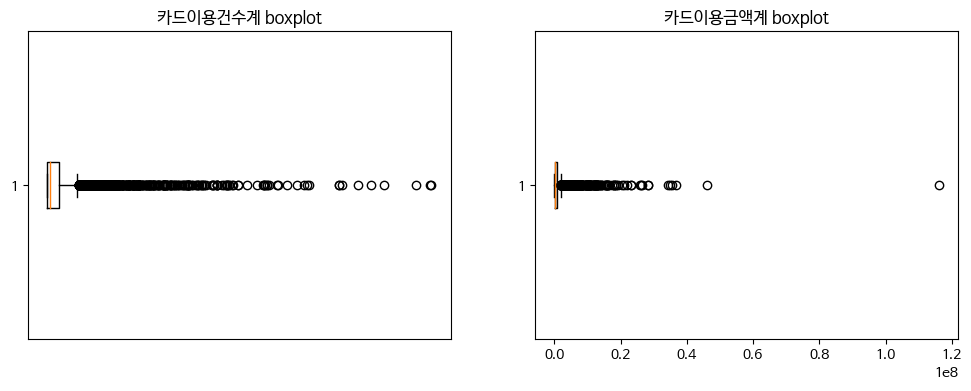

In [250]:
# boxplot 출력 - 수치형 데이터 이상치 시각화
plt.figure(figsize =(12,4))
plt.subplots_adjust(hspace=0.5) #간격조절

plt.subplot(121)
plt.boxplot(df1['카드이용건수계(USECT_CORR)'], vert=False)
plt.xticks([])
plt.title('카드이용건수계 boxplot')

plt.subplot(122)
plt.boxplot(df1['카드이용금액계(AMT_CORR)'], vert=False)
plt.title('카드이용금액계 boxplot')

- 카드이용건수계, 카드이용금액계 모두 이상치가 존재함.

In [251]:
# 4분위수 범위를 이용한 이상치 제거 함수

def outlier_4q(df, column_index, upper = 1.5, lower = 1.5):
    Q1 = df.iloc[:, column_index].quantile(.25)
    Q3 = df.iloc[:, column_index].quantile(.75)
    IQR = Q3-Q1
    Upper_IQR = Q3 + upper * IQR
    Lower_IQR = Q1 - lower * IQR
    print(f'Upper Tukey Fences : {Upper_IQR}, Lower Tukey Fences : {Lower_IQR}')
    print(df.columns[column_index],'의 제거된 행:',len(df.loc[df.iloc[:,column_index]>=Upper_IQR]),'개')
    df.drop(df.loc[df.iloc[:,column_index]>=Upper_IQR].index, inplace=True)

# Z-Score를 이용한 이상치 제거 함수
def outlier_z(df, column_index, sigma):
    Upper_sigma = df.iloc[:, column_index].mean() + df.iloc[:, column_index].std()*sigma
    Lower_sigma = df.iloc[:, column_index].mean() - df.iloc[:, column_index].std()*sigma
    print(f'Upper {sigma}Sgima Bound :{Upper_sigma}, Lower {sigma}Sgima Bound :{Lower_sigma}')
    print(df.columns[column_index],'의 제거된 행:',len(df.loc[df.iloc[:,column_index]>=Upper_sigma]),'개')
    df.drop(df.loc[df.iloc[:,column_index]>=Upper_sigma].index, inplace=True)

# 최댓값을 가진 행을 n번 제거하는 함수
def doutlier_max(df, column_index, n):
    for i in range(n):
        df.drop(df[df.iloc[:,column_index]==np.max(df.iloc[:,column_index])].index, axis=0, inplace=True)
    print(f'{df.columns[column_index]}의 제거된 행 : {n}개')

In [252]:
# z-score를 이용한 이상치 제거
outlier_z(df1, 4, 3) #카드이용건수계
print('\n')
outlier_z(df1, 5, 3) #카드이용금액계

Upper 3Sgima Bound :205.07346890940653, Lower 3Sgima Bound :-143.75780224273984
카드이용건수계(USECT_CORR) 의 제거된 행: 130 개


Upper 3Sgima Bound :8202320.783541782, Lower 3Sgima Bound :-6488014.80568829
카드이용금액계(AMT_CORR) 의 제거된 행: 65 개


3 sigma 를 이용해 이상치를 제거함
- 카드이용건수계가 205.07건 이상인 행 130개 제거
- 카드이용금액계가 8,202,320원 이상인 행 65개를 제거함.

In [253]:
df3.describe()

,기준일자(YMD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
count,6000.00,6000.00,6000.00
mean,20200665.71,411301.77,12.39
std,345.33,1966825.98,25.27
min,20200101.00,5.00,5.00
25%,20200383.50,41902.00,5.00
50%,20200665.50,118092.00,5.00
75%,20200947.75,321920.25,10.00
max,20201231.00,127750000.00,1369.00


- 카드이용금액계 : 평균 411,301원, 표준편차 1,966,825, 최솟값 5원, 최댓값 127,750,000원
- 카드이용건수계 : 평균 12.39건, 표준편차 25.27, 최솟값 5건, 최댓값 1,369건

In [254]:
df4.describe()

,시간대구간(TIME),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
count,6000.00,6000.00,6000.00
mean,3.70,566423.21,17.74
std,1.50,1714633.19,23.34
min,1.00,5.00,5.00
25%,3.00,71540.00,5.00
50%,4.00,206495.00,10.00
75%,5.00,545421.25,20.00
max,6.00,56980384.00,659.00


- 카드이용금액계 : 평균 566,423원, 표준편차 1,714,633, 최솟값 5원, 최댓값 56,980,384원
- 카드이용건수계 : 평균 17.7건, 표준편차 23.3, 최솟값 5건, 최대값 659건

<function matplotlib.pyplot.show(close=None, block=None)>

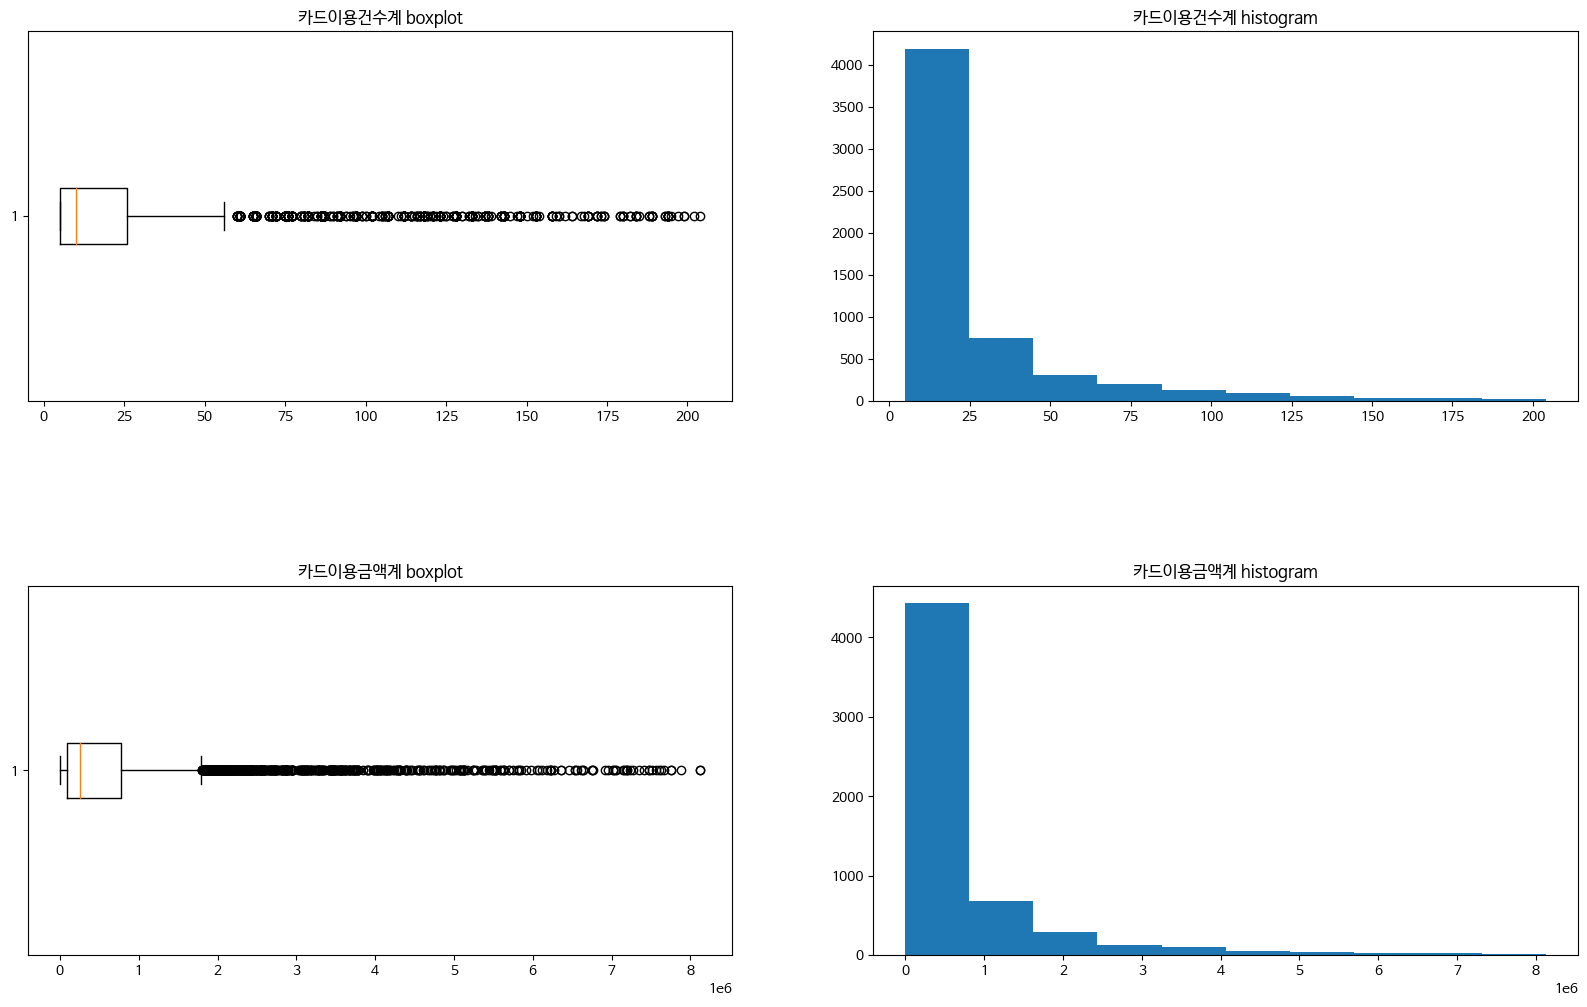

In [255]:
# boxplot 출력 - 수치형 데이터 이상치 시각화
plt.figure(figsize =(20,12))
plt.subplots_adjust(hspace=0.5) #간격조절

plt.subplot(221)
plt.boxplot(df1['카드이용건수계(USECT_CORR)'], vert=False)
plt.title('카드이용건수계 boxplot')

plt.subplot(222)
plt.hist(df1['카드이용건수계(USECT_CORR)'])
plt.title('카드이용건수계 histogram')

plt.subplot(223)
plt.boxplot(df1['카드이용금액계(AMT_CORR)'], vert=False)
plt.title('카드이용금액계 boxplot')

plt.subplot(224)
plt.hist(df1['카드이용금액계(AMT_CORR)'])
plt.title('카드이용금액계 histogram')
plt.show

### 2.3 파생변수 생성

In [256]:
# '건당카드이용금액' 생성 함수
def 건당카드이용금액(df, 금액_index, 건수_index):
    df['건당카드이용금액(MEAN_CORR)'] = round(df.iloc[:, 금액_index] / df.iloc[:, 건수_index],2)
    return df.head()

In [257]:
건당카드이용금액(df1, 5, 4) #df1

,기준년월(YM),서울시민업종코드(UPJONG_CD),성별(GENDER),연령대별(AGE),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR),기준년도,건당카드이용금액(MEAN_CORR)
6000,202001,SS008,F,20대,26,444059,2020,17079.19
6001,202001,SS040,F,30대,66,656635,2020,9949.02
6002,202001,SS012,F,60대,15,83273,2020,5551.53
6003,202001,SS008,F,50대,72,749637,2020,10411.62
6004,202001,SS030,M,40대,5,454790,2020,90958.00


In [258]:
건당카드이용금액(df3, 3, 4) #df3

,가맹점주소광역시도(SIDO),업종대분류(UPJONG_CLASS1),기준일자(YMD),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR),기준년도,건당카드이용금액(MEAN_CORR)
6000,서울,요식유흥,20200103,63875,10,2020,6387.50
6001,서울,음식료품,20200101,553515,20,2020,27675.75
6002,서울,전자상거래,20200131,612689,5,2020,122537.80
6003,서울,요식유흥,20200120,30660,5,2020,6132.00
6004,서울,전자상거래,20200124,68985,5,2020,13797.00


In [259]:
건당카드이용금액(df4, 3, 4) #df4

,업종대분류(UPJONG_CLASS1),기준일자(YMD),시간대구간(TIME),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR),기준년도,건당카드이용금액(MEAN_CORR)
6000,전자상거래,2020-01-25,3,277555,5,2020,55511.00
6001,전자상거래,2020-01-26,6,27492,5,2020,5498.40
6002,주유,2020-01-13,3,655812,10,2020,65581.20
6003,유통,2020-01-12,3,49312,15,2020,3287.47
6004,자동차,2020-01-10,4,161476,10,2020,16147.60


In [260]:
# df1, df5 합치기 (기준)
df1.head(2)

,기준년월(YM),서울시민업종코드(UPJONG_CD),성별(GENDER),연령대별(AGE),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR),기준년도,건당카드이용금액(MEAN_CORR)
6000,202001,SS008,F,20대,26,444059,2020,17079.19
6001,202001,SS040,F,30대,66,656635,2020,9949.02


In [261]:
df5.head(2)

,업종코드(UPJONG_CD),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3)
0,ss001,요식/유흥,한식,한식
1,ss002,요식/유흥,일식/중식/양식,일식


- df1 서울시민업종코드(UPJONG_CD) 과 df5 업종코드(UPJONG_CD) 기준으로 합치기
- df5 업종코드 소문자 -> 대문자

In [262]:
#df5 업종코드 대문자로 변경
df5['업종코드(UPJONG_CD)'] = df5['업종코드(UPJONG_CD)'].str.upper()

#업종코드 기준으로 inner merge
df1 = pd.merge(df1, df5, left_on='서울시민업종코드(UPJONG_CD)', right_on='업종코드(UPJONG_CD)', how='inner')

#중복 칼럼 삭제
df1 = df1.drop(['업종코드(UPJONG_CD)'], axis=1)
df1.head()

,기준년월(YM),서울시민업종코드(UPJONG_CD),성별(GENDER),연령대별(AGE),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR),기준년도,건당카드이용금액(MEAN_CORR),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3)
0,202001,SS008,F,20대,26,444059,2020,17079.19,요식/유흥,기타요식,기타요식
1,202001,SS008,F,50대,72,749637,2020,10411.62,요식/유흥,기타요식,기타요식
2,202001,SS008,M,50대,87,1190119,2020,13679.53,요식/유흥,기타요식,기타요식
3,202001,SS008,M,50대,72,1333710,2020,18523.75,요식/유흥,기타요식,기타요식
4,202001,SS008,F,50대,66,1227933,2020,18605.05,요식/유흥,기타요식,기타요식


In [263]:
# 카드이용금액계 120만 이상 '대', 70만 이상 '중', 나머지 '소'인 '카드소비량' 생성
df1['카드소비량(RATE_CORR)'] = np.where(df1['카드이용금액계(AMT_CORR)']>=1200000, "대",
                                  np.where(df1['카드이용금액계(AMT_CORR)']>=700000, "중","소"))
df1.head(5)

,기준년월(YM),서울시민업종코드(UPJONG_CD),성별(GENDER),연령대별(AGE),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR),기준년도,건당카드이용금액(MEAN_CORR),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3),카드소비량(RATE_CORR)
0,202001,SS008,F,20대,26,444059,2020,17079.19,요식/유흥,기타요식,기타요식,소
1,202001,SS008,F,50대,72,749637,2020,10411.62,요식/유흥,기타요식,기타요식,중
2,202001,SS008,M,50대,87,1190119,2020,13679.53,요식/유흥,기타요식,기타요식,중
3,202001,SS008,M,50대,72,1333710,2020,18523.75,요식/유흥,기타요식,기타요식,대
4,202001,SS008,F,50대,66,1227933,2020,18605.05,요식/유흥,기타요식,기타요식,대


## 3. 데이터 검정
### 3.1 데이터 시각화

In [264]:
df1.head()

,기준년월(YM),서울시민업종코드(UPJONG_CD),성별(GENDER),연령대별(AGE),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR),기준년도,건당카드이용금액(MEAN_CORR),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3),카드소비량(RATE_CORR)
0,202001,SS008,F,20대,26,444059,2020,17079.19,요식/유흥,기타요식,기타요식,소
1,202001,SS008,F,50대,72,749637,2020,10411.62,요식/유흥,기타요식,기타요식,중
2,202001,SS008,M,50대,87,1190119,2020,13679.53,요식/유흥,기타요식,기타요식,중
3,202001,SS008,M,50대,72,1333710,2020,18523.75,요식/유흥,기타요식,기타요식,대
4,202001,SS008,F,50대,66,1227933,2020,18605.05,요식/유흥,기타요식,기타요식,대


In [265]:
#연령과 업종 대분류 빈도수 crosstab()
pd.crosstab(df1['연령대별(AGE)'],df1['대분류(CLASS1)'])

대분류(CLASS1),가전/가구,가정생활/서비스,교육/학원,미용,스포츠/문화/레저,여행/교통,요식/유흥,유통,음/식료품,의료,의류/잡화,자동차,전자상거래,주유
연령대별(AGE),,,,,,,,,,,,,,
10대,0,7,5,0,15,4,54,25,8,1,9,1,12,1
20대,14,89,21,65,84,50,322,172,54,88,51,20,95,20
30대,19,116,48,51,90,46,298,172,67,100,43,34,97,32
40대,34,130,53,42,91,37,275,190,78,107,43,21,72,45
50대,24,124,18,38,49,20,279,164,91,125,37,20,85,42
60대,11,82,6,20,28,13,157,107,68,83,24,18,32,34
70대이상,4,32,1,6,7,5,60,56,29,54,11,3,7,13


In [266]:
#성별에 따른 카드이용금액 합계 시각화
df1_gender = pd.DataFrame(df1.groupby('성별(GENDER)').sum()['카드이용금액계(AMT_CORR)']/1000).reset_index()
df1_gender

,성별(GENDER),카드이용금액계(AMT_CORR)
0,F,2051265.88
1,M,1959880.83


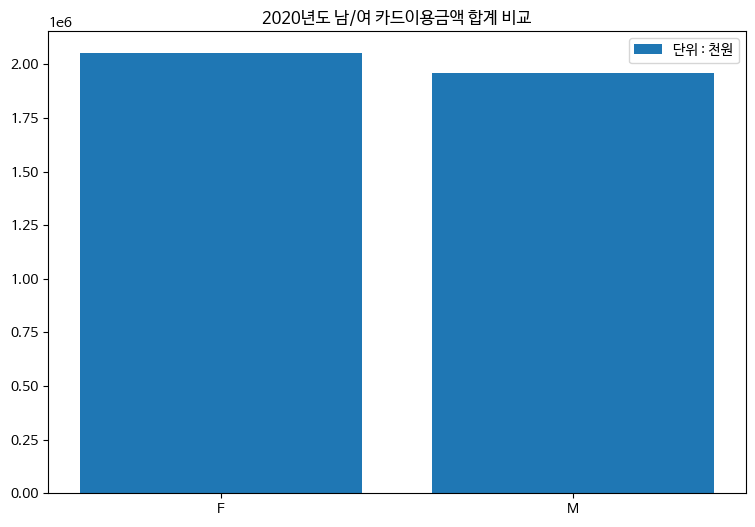

In [267]:
plt.figure(figsize=(9,6))
plt.bar(df1_gender['성별(GENDER)'],df1_gender['카드이용금액계(AMT_CORR)'],label = '단위 : 천원')
plt.title("2020년도 남/여 카드이용금액 합계 비교")
plt.legend()
plt.show()

- 2020년 총 카드이용금액은 남자보다 여자가 더 많음.

In [268]:
# 연령대에 따라 카드이용건수 평균 시각화
df1_age = pd.DataFrame(df1.groupby('연령대별(AGE)').mean()['카드이용건수계(USECT_CORR)']).reset_index()
df1_age

,연령대별(AGE),카드이용건수계(USECT_CORR)
0,10대,15.77
1,20대,23.88
2,30대,27.31
3,40대,25.55
4,50대,23.09
5,60대,18.62
6,70대이상,16.07


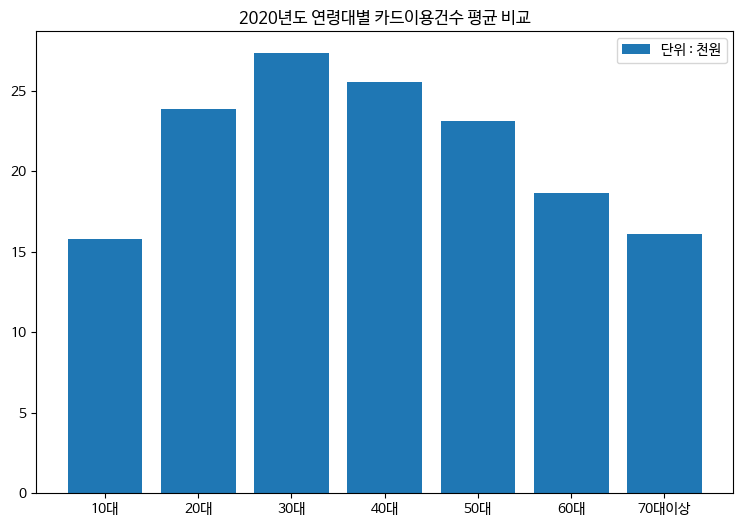

In [269]:
plt.figure(figsize=(9,6))
plt.bar(df1_age['연령대별(AGE)'], df1_age['카드이용건수계(USECT_CORR)'], label='단위 : 천원')
plt.title('2020년도 연령대별 카드이용건수 평균 비교')
plt.legend()
plt.show()

- 2020년도 연령대별 카드이용건수의 평균을 비교한 결과 30대가 가장 높고 다음으로 40대, 20대가 높다.


In [270]:
# 월별 카드이용금액 및 카드이용횟수 합계 시각화

## 'month' 컬럼 생성
df1['월(month)'] = df1['기준년월(YM)'].astype(str).map(lambda x:x[4:])
## groupy
df1_month = pd.DataFrame(df1.groupby('월(month)').sum()[['카드이용금액계(AMT_CORR)','카드이용건수계(USECT_CORR)']]).reset_index()
df1_month['카드이용금액계(AMT_CORR)'] = df1_month['카드이용금액계(AMT_CORR)']/1000
df1_month

,월(month),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,01,336467.39,11288
1,02,326320.10,10856
2,03,306113.00,11125
3,04,305748.49,10770
4,05,306459.22,10995
5,06,358274.71,13102
6,07,361052.55,12128
7,08,339724.96,11008
8,09,351554.94,11933
9,10,323608.40,11304


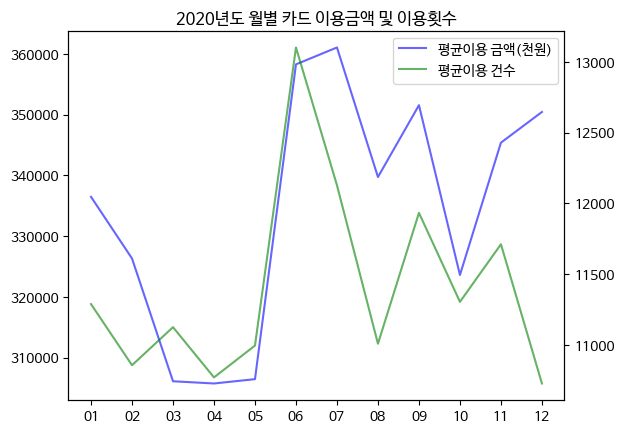

In [271]:
fig, ax1 = plt.subplots()
line1 = ax1.plot(df1_month['월(month)'], df1_month['카드이용금액계(AMT_CORR)'],
                color = 'blue', label = '평균이용 금액(천원)', alpha = 0.6 )

ax2 = ax1.twinx()
line2 = ax2.plot(df1_month['월(month)'], df1_month['카드이용건수계(USECT_CORR)'],
                color = 'green', label = '평균이용 건수', alpha = 0.6 )

lines = line1 + line2
labels = [i.get_label() for i in lines]
plt.legend(lines, labels, fontsize = 10)

plt.title("2020년도 월별 카드 이용금액 및 이용횟수")
plt.show()

- 2020년 5월 카드 이용금액과 횟수가 급격하게 올랐음.
- 2020년 2-5월 전까지 카드 소비가 가장 적다.
- 2020년 12월 카드 이용금액과 횟수의 차가 가장 크다. 이용 건수에 비에 금액이 높은 것을 보아 주로 한 번 결제 시 단가가 큰 금액을 소비하는 것을 알 수 있다.

In [272]:
df1.head()

,기준년월(YM),서울시민업종코드(UPJONG_CD),성별(GENDER),연령대별(AGE),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR),기준년도,건당카드이용금액(MEAN_CORR),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3),카드소비량(RATE_CORR),월(month)
0,202001,SS008,F,20대,26,444059,2020,17079.19,요식/유흥,기타요식,기타요식,소,01
1,202001,SS008,F,50대,72,749637,2020,10411.62,요식/유흥,기타요식,기타요식,중,01
2,202001,SS008,M,50대,87,1190119,2020,13679.53,요식/유흥,기타요식,기타요식,중,01
3,202001,SS008,M,50대,72,1333710,2020,18523.75,요식/유흥,기타요식,기타요식,대,01
4,202001,SS008,F,50대,66,1227933,2020,18605.05,요식/유흥,기타요식,기타요식,대,01


In [273]:
# 남녀별 월별 이용금액, 이용횟수, 1회 이용금액 합계 시각화

# 남녀별 데이터
df1_female = df1[df1['성별(GENDER)']=='F']
df1_male = df1[df1['성별(GENDER)']=='M']

## 월 별 카드이용금액 합계 함수
def group_month(df):
    df_month2 = pd.DataFrame(df.groupby('월(month)').sum()[['카드이용금액계(AMT_CORR)','카드이용건수계(USECT_CORR)','건당카드이용금액(MEAN_CORR)']].reset_index())
    df_month2['카드이용금액계(AMT_CORR)'] = df_month2['카드이용금액계(AMT_CORR)']/1000
    df_month2['건당카드이용금액(MEAN_CORR)'] = df_month2['건당카드이용금액(MEAN_CORR)']/1000
    return df_month2

In [274]:
df1_month_f = group_month(df1_female) #여자
df1_month_f

,월(month),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR),건당카드이용금액(MEAN_CORR)
0,01,171214.67,5406,10732.76
1,02,152887.21,4926,12497.12
2,03,155270.24,5410,10284.58
3,04,175899.13,5992,11505.00
4,05,158949.09,5804,9751.09
5,06,188035.53,7277,8973.23
6,07,197529.66,6165,13407.85
7,08,166569.25,5565,10832.75
8,09,198861.60,6925,10160.46
9,10,161519.36,5726,9688.91


In [275]:
df1_month_m = group_month(df1_male) #남자
df1_month_m

,월(month),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR),건당카드이용금액(MEAN_CORR)
0,01,165252.72,5882,11284.85
1,02,173432.88,5930,11381.97
2,03,150842.76,5715,10597.41
3,04,129849.36,4778,8299.42
4,05,147510.13,5191,10189.40
5,06,170239.17,5825,10771.04
6,07,163522.89,5963,9203.70
7,08,173155.71,5443,12849.92
8,09,152693.34,5008,9057.37
9,10,162089.04,5578,10350.09


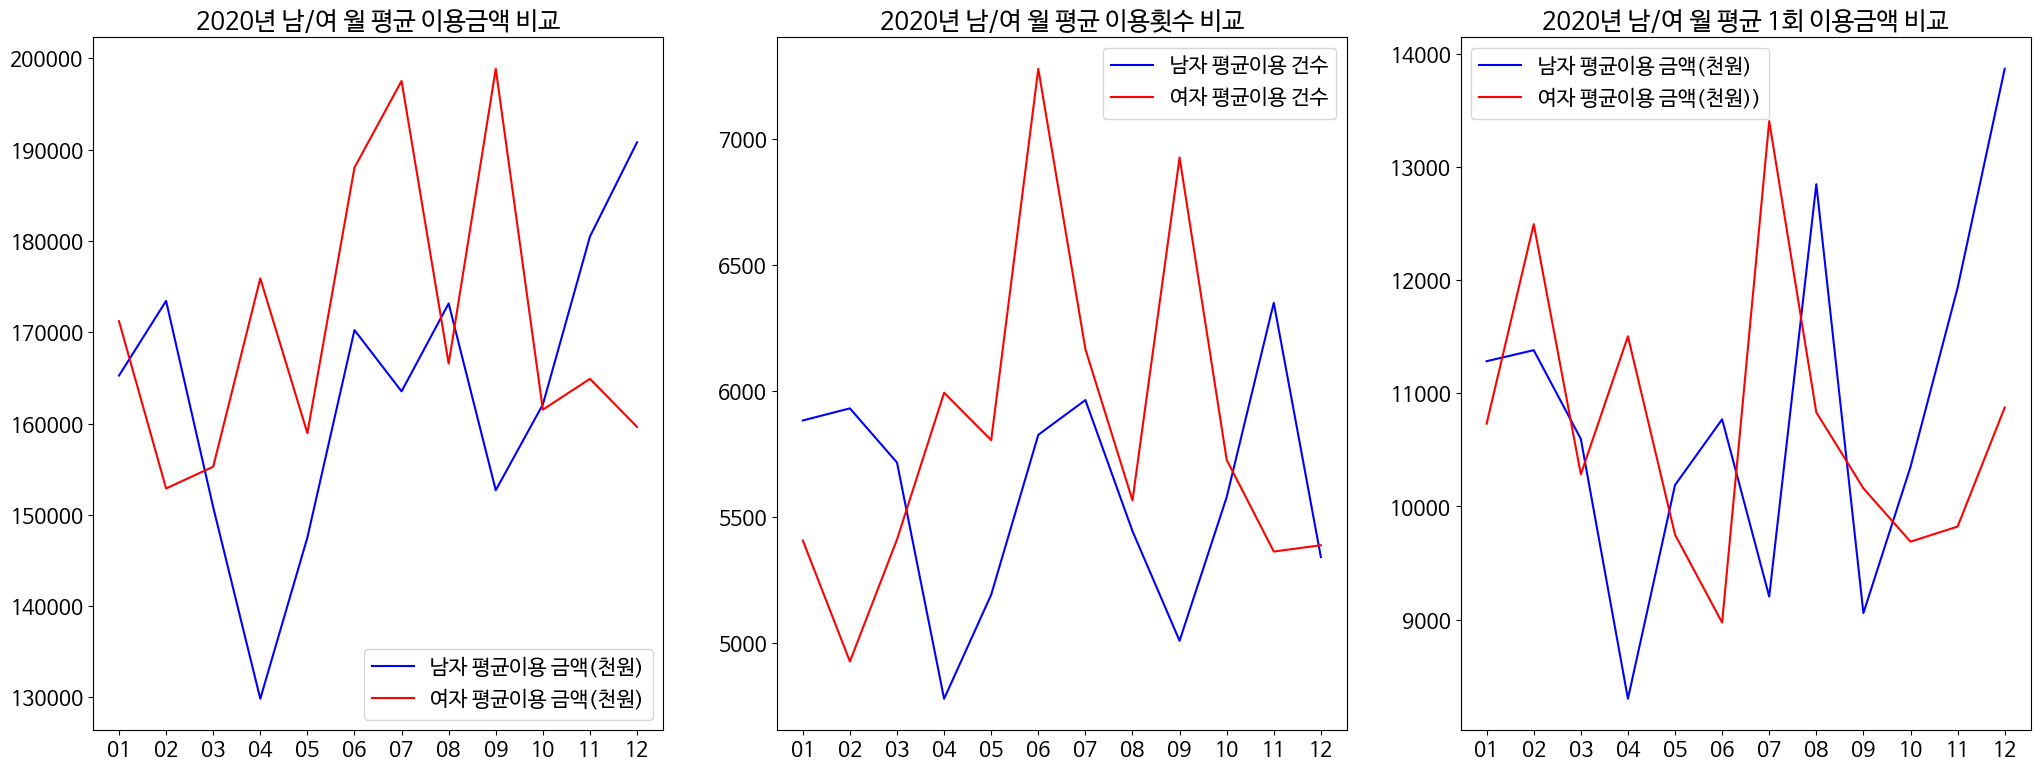

In [276]:
plt.figure(figsize = (25,9))
plt.rc('font', size=15)
plt.subplot(131)
plt.plot(df1_month_m['월(month)'], df1_month_m['카드이용금액계(AMT_CORR)'],
        color = 'blue', label ='남자 평균이용 금액(천원)')
plt.plot(df1_month_f['월(month)'], df1_month_f['카드이용금액계(AMT_CORR)'],
        color = 'red', label ='여자 평균이용 금액(천원)')
plt.legend()
plt.title('2020년 남/여 월 평균 이용금액 비교')

plt.subplot(132)
plt.plot(df1_month_m['월(month)'], df1_month_m['카드이용건수계(USECT_CORR)'],
        color = 'blue', label ='남자 평균이용 건수')
plt.plot(df1_month_f['월(month)'], df1_month_f['카드이용건수계(USECT_CORR)'],
        color = 'red', label ='여자 평균이용 건수')
plt.legend()
plt.title('2020년 남/여 월 평균 이용횟수 비교')

plt.subplot(133)
plt.plot(df1_month_m['월(month)'], df1_month_m['건당카드이용금액(MEAN_CORR)'],
        color = 'blue', label ='남자 평균이용 금액(천원)')
plt.plot(df1_month_f['월(month)'], df1_month_f['건당카드이용금액(MEAN_CORR)'],
        color = 'red', label ='여자 평균이용 금액(천원))')
plt.legend()
plt.title('2020년 남/여 월 평균 1회 이용금액 비교')
plt.show()

- 남녀별로 카드 소비가 어떻게 다른지 시각화해보았다.  월별 평균 이용금액과 횟수 모두 여성이 대부분 높다. 연초와 연말의 경우를 제외하면 남녀 모두 이용금액과 건수의 그래프가 대칭적으로 비슷한 양상을 보이는 것을 확인하였다.
- 평균 1회 이용금액 그래프를 보면 연말에 남성의 소비가 높은 것을 확인 할 수 있다.

In [277]:
# df4 - 시간대 구간별 카드이용금액 합계
df4.head(3)

,업종대분류(UPJONG_CLASS1),기준일자(YMD),시간대구간(TIME),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR),기준년도,건당카드이용금액(MEAN_CORR)
6000,전자상거래,2020-01-25,3,277555,5,2020,55511.00
6001,전자상거래,2020-01-26,6,27492,5,2020,5498.40
6002,주유,2020-01-13,3,655812,10,2020,65581.20


In [278]:
df4_time = pd.DataFrame(df4.groupby('시간대구간(TIME)').sum()['카드이용금액계(AMT_CORR)']/1000).reset_index()
df4_time

,시간대구간(TIME),카드이용금액계(AMT_CORR)
0,1,172769.13
1,2,482495.88
2,3,778022.81
3,4,647187.95
4,5,983296.23
5,6,334767.28


- T1: 0시-6시 미만
- T2: 6시-11시 미만
- T3: 11시-4시 미만
- T4: 14시-17시 미만
- T5: 17시-21시 미만
- T6: 21시-24시 미만

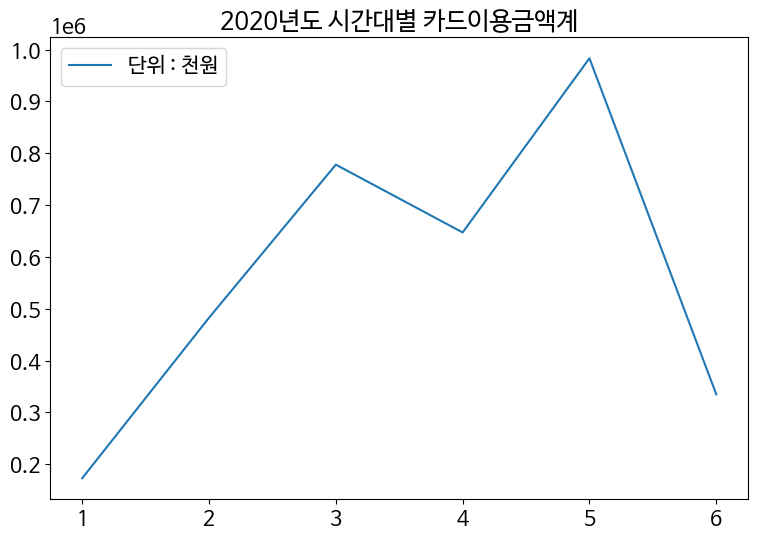

In [279]:
plt.figure(figsize=(9,6))
plt.plot(df4_time['시간대구간(TIME)'], df4_time['카드이용금액계(AMT_CORR)'], label='단위 : 천원')
plt.title('2020년도 시간대별 카드이용금액계')
plt.legend()
plt.show()

- 17시부터 21시 사이 카드이용금액이 가장 높음

In [280]:
df4.head()

,업종대분류(UPJONG_CLASS1),기준일자(YMD),시간대구간(TIME),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR),기준년도,건당카드이용금액(MEAN_CORR)
6000,전자상거래,2020-01-25,3,277555,5,2020,55511.00
6001,전자상거래,2020-01-26,6,27492,5,2020,5498.40
6002,주유,2020-01-13,3,655812,10,2020,65581.20
6003,유통,2020-01-12,3,49312,15,2020,3287.47
6004,자동차,2020-01-10,4,161476,10,2020,16147.60


In [281]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 6000 to 11999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   업종대분류(UPJONG_CLASS1)  6000 non-null   object        
 1   기준일자(YMD)             6000 non-null   datetime64[ns]
 2   시간대구간(TIME)           6000 non-null   int64         
 3   카드이용금액계(AMT_CORR)     6000 non-null   int64         
 4   카드이용건수계(USECT_CORR)   6000 non-null   int64         
 5   기준년도                  6000 non-null   object        
 6   건당카드이용금액(MEAN_CORR)   6000 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 375.0+ KB


In [282]:
# 요일별 카드이용금액 평균

##복사
df4_date = df4.copy()
##요일 생성
df4_date['요일'] = df4_date['기준일자(YMD)'].dt.weekday + 1
# df4_date['요일'] = df4_date['요일'].replace([1,2,3,4,5,6,7],
#                                         ['월','화','수','목','금','토','일'])
df4_date.head(3)

,업종대분류(UPJONG_CLASS1),기준일자(YMD),시간대구간(TIME),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR),기준년도,건당카드이용금액(MEAN_CORR),요일
6000,전자상거래,2020-01-25,3,277555,5,2020,55511.00,6
6001,전자상거래,2020-01-26,6,27492,5,2020,5498.40,7
6002,주유,2020-01-13,3,655812,10,2020,65581.20,1


In [283]:
## 요일별 카드이용금액 평균 시각화
df4_요일 = pd.DataFrame(df4_date.groupby('요일').mean()['카드이용금액계(AMT_CORR)']/1000).reset_index()
df4_요일 = df4_요일.sort_values(by='요일')
df4_요일['요일'] = df4_요일['요일'].replace([1,2,3,4,5,6,7],
                                         ['월','화','수','목','금','토','일'])
df4_요일

,요일,카드이용금액계(AMT_CORR)
0,월,678.03
1,화,494.72
2,수,538.70
3,목,612.35
4,금,625.91
5,토,464.22
6,일,537.21


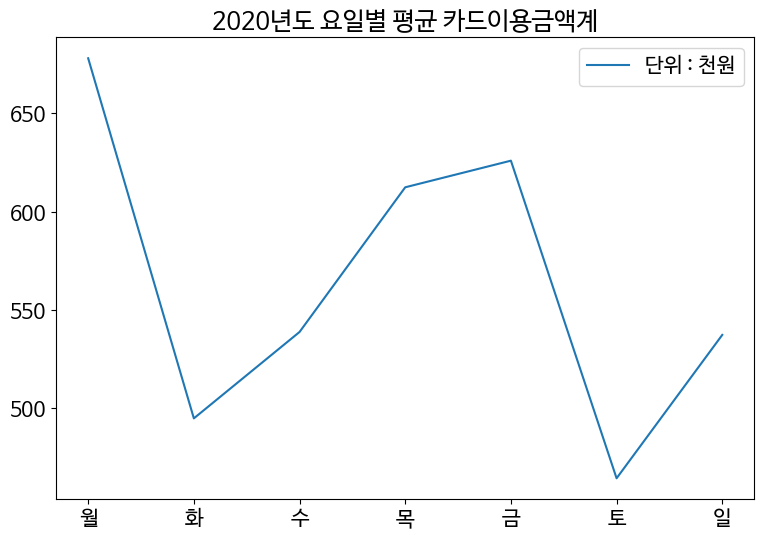

In [284]:
plt.figure(figsize=(9,6))
plt.plot(df4_요일['요일'], df4_요일['카드이용금액계(AMT_CORR)'], label='단위 : 천원')
plt.title('2020년도 요일별 평균 카드이용금액계')
plt.legend()
plt.show()

- 2020년도 요일별 평균 카드이용금액을 살펴보면 월요일이 가장 높고, 토요일이 가장 낮다.

In [285]:
# 남녀별 업종 대분류별 카드이용금액 및 건수 합계

##남자
df1_male.head(2)

,기준년월(YM),서울시민업종코드(UPJONG_CD),성별(GENDER),연령대별(AGE),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR),기준년도,건당카드이용금액(MEAN_CORR),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3),카드소비량(RATE_CORR),월(month)
2,202001,SS008,M,50대,87,1190119,2020,13679.53,요식/유흥,기타요식,기타요식,중,01
3,202001,SS008,M,50대,72,1333710,2020,18523.75,요식/유흥,기타요식,기타요식,대,01


In [286]:
##여자
df1_female.head(2)

,기준년월(YM),서울시민업종코드(UPJONG_CD),성별(GENDER),연령대별(AGE),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR),기준년도,건당카드이용금액(MEAN_CORR),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3),카드소비량(RATE_CORR),월(month)
0,202001,SS008,F,20대,26,444059,2020,17079.19,요식/유흥,기타요식,기타요식,소,01
1,202001,SS008,F,50대,72,749637,2020,10411.62,요식/유흥,기타요식,기타요식,중,01


In [287]:
## 업종 대분류별 카드이용금액 및 건수 합계 함수
def group_class1(df):
    df_class1 = pd.DataFrame(df.groupby('대분류(CLASS1)').sum()[['카드이용금액계(AMT_CORR)','카드이용건수계(USECT_CORR)']].reset_index())
    df_class1['카드이용금액계(AMT_CORR)'] = df_class1['카드이용금액계(AMT_CORR)']/1000
    return df_class1

In [288]:
## 남자별 업종 대분류별 카드이용금액 및 건수 합계
df1_class1_m = group_class1(df1_male)
df1_class1_m

,대분류(CLASS1),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,가전/가구,32018.64,627
1,가정생활/서비스,237831.61,4493
2,교육/학원,66404.14,521
3,미용,28101.23,955
4,스포츠/문화/레저,100064.53,2568
5,여행/교통,68024.93,1737
6,요식/유흥,396034.76,19694
7,유통,280418.36,16413
8,음/식료품,69779.30,2795
9,의료,167467.99,5628


In [289]:
## 여자별 업종 대분류별 카드이용금액 및 건수 합계
df1_class1_f = group_class1(df1_female)
df1_class1_f

,대분류(CLASS1),카드이용금액계(AMT_CORR),카드이용건수계(USECT_CORR)
0,가전/가구,43607.49,350
1,가정생활/서비스,211175.55,4346
2,교육/학원,109417.97,812
3,미용,45883.21,955
4,스포츠/문화/레저,73441.83,1925
5,여행/교통,38665.68,1677
6,요식/유흥,338697.23,20765
7,유통,369800.21,17737
8,음/식료품,91858.88,3693
9,의료,194072.79,4804


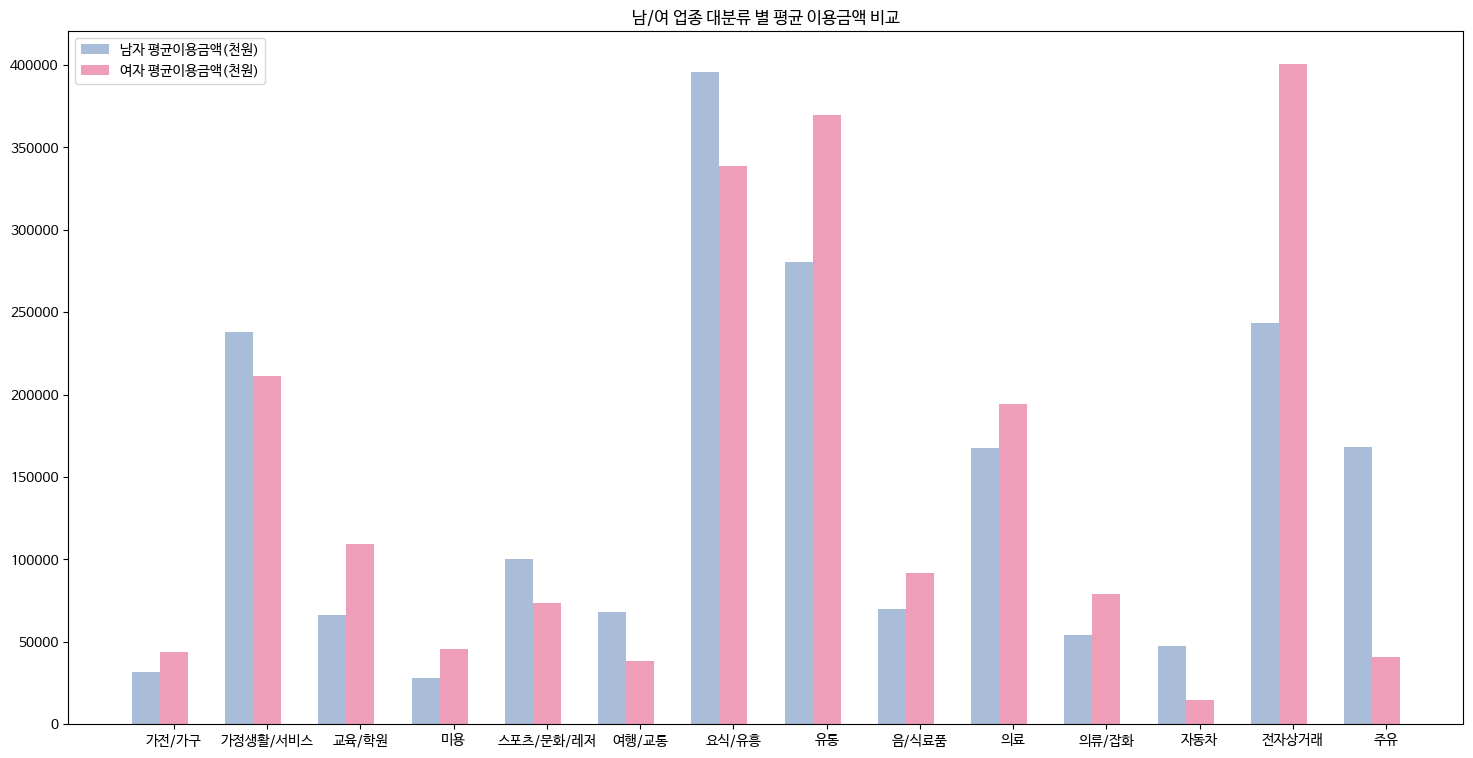

In [290]:
plt.rc('font', size=10)
plt.figure(figsize=(18, 9))
bar_width = 0.3
index = np.arange(14)

bar1 = plt.bar(index, df1_class1_m['카드이용금액계(AMT_CORR)'],
              bar_width, color = '#A9BDD8', label = '남자 평균이용금액(천원)')

bar2 = plt.bar(index+bar_width, df1_class1_f['카드이용금액계(AMT_CORR)'],
              bar_width, color = '#EF9EB9', label = '여자 평균이용금액(천원)')

plt.xticks(np.arange(bar_width, 14+bar_width, 1), df1_class1_m['대분류(CLASS1)'])
plt.legend()
plt.title('남/여 업종 대분류 별 평균 이용금액 비교')
plt.show()

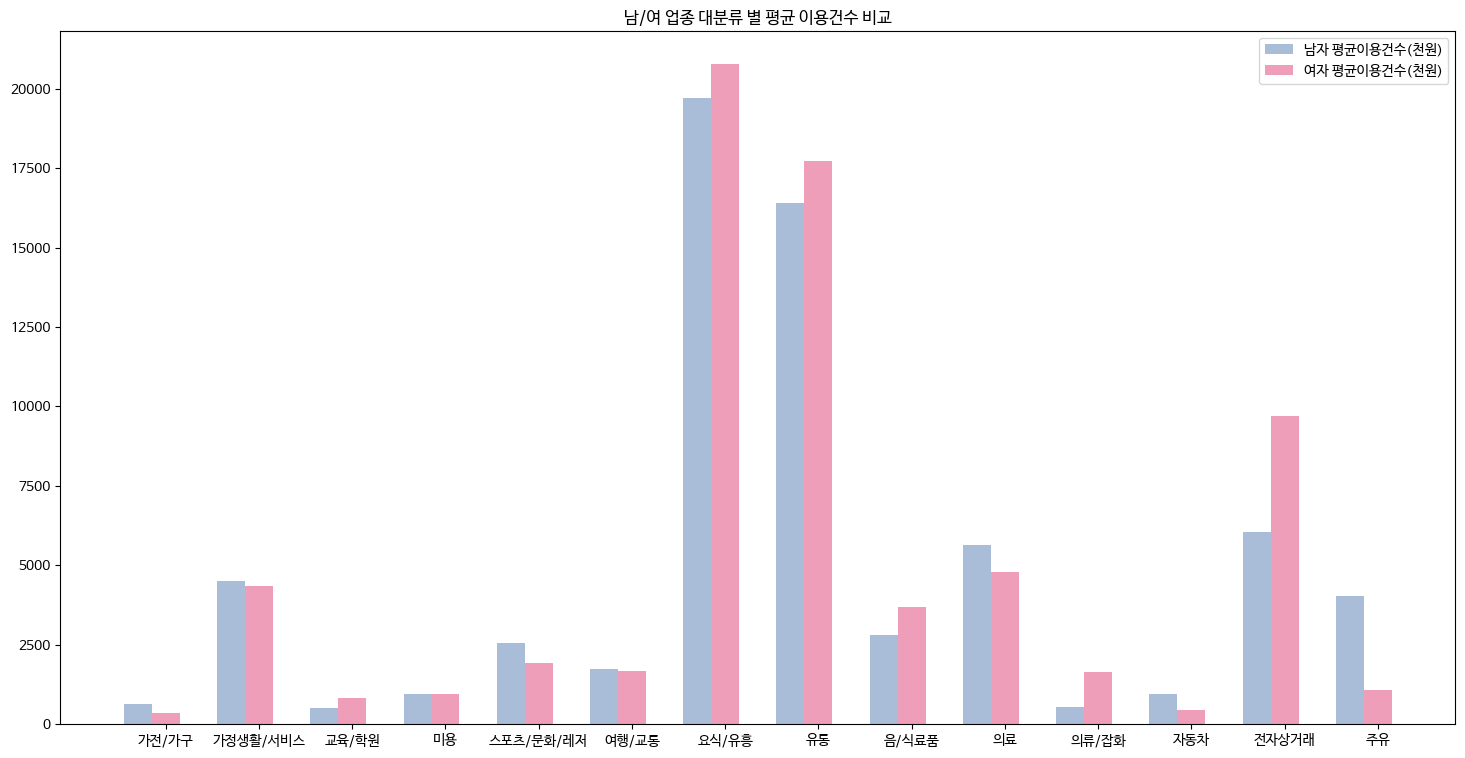

In [291]:
plt.figure(figsize=(18, 9))
bar_width = 0.3
index = np.arange(14)

bar1 = plt.bar(index, df1_class1_m['카드이용건수계(USECT_CORR)'],
               bar_width,
               color = '#A9BDD8',
               label = '남자 평균이용건수(천원)')
bar2 = plt.bar(index + bar_width, df1_class1_f['카드이용건수계(USECT_CORR)'],
               bar_width,
               color = '#EF9EB9',
               label = '여자 평균이용건수(천원)')

plt.xticks(np.arange(bar_width, 14+bar_width, 1), df1_class1_m['대분류(CLASS1)'])

plt.legend()
plt.title('남/여 업종 대분류 별 평균 이용건수 비교')
plt.show()

- 서울 시민들의 소비가 많은 업종 TOP3는 요식&유흥, 유통, 전자상거래이다.
- 요식&유흥의 경우 남성이 여성보다 건수에 비해 이용금액이 더 높은 것을 보아 여성보다 더 큰 금액대의 소비를 하는 것으로 확인된다.
- 남성보다 여성 의료의 금액대가 좀 더 높은것으로 확인된다.
- 여성의 경우 대체로 미용 와 같은 쇼핑(의류&잡화, 전자상거래, 유통, 미용등) 또는 가정(교육&학원, 가전&가구, 음&식료품) 관련의 소비가 높다.
- 남성의 경우 자동차, 주유, 스포츠, 여행&교통과 같은 자동차, 레저 부류의 소비가 높다.

### 3.2. 통계적 검정
 - 평균 비교 : 두 집단간 평균 비교
 - 대응표본 평균비교 : 대응되는 표본끼리 평균 비교(ex. 다이어트 전후)
 - 상관분석 : 두 데이터간 상관관계 분석
 - 회귀분석 : 두 데이터간 인과관계 분석

In [292]:
df1.head()

,기준년월(YM),서울시민업종코드(UPJONG_CD),성별(GENDER),연령대별(AGE),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR),기준년도,건당카드이용금액(MEAN_CORR),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3),카드소비량(RATE_CORR),월(month)
0,202001,SS008,F,20대,26,444059,2020,17079.19,요식/유흥,기타요식,기타요식,소,01
1,202001,SS008,F,50대,72,749637,2020,10411.62,요식/유흥,기타요식,기타요식,중,01
2,202001,SS008,M,50대,87,1190119,2020,13679.53,요식/유흥,기타요식,기타요식,중,01
3,202001,SS008,M,50대,72,1333710,2020,18523.75,요식/유흥,기타요식,기타요식,대,01
4,202001,SS008,F,50대,66,1227933,2020,18605.05,요식/유흥,기타요식,기타요식,대,01


In [293]:
# 연령대와 업종 소분류가 연관이 있는지?
df1_cross = pd.crosstab(df1['연령대별(AGE)'],df1['소분류(CLASS3)'])
df1_cross

소분류(CLASS3),LPG,가구,가전,결제대행(PG),교육용품,교통,기타가전/가구,기타요식,기타유통,기타유흥업소,...,편의점,한식,한의원,할인점/슈퍼마켓,항공,헬스,호텔/콘도,홈쇼핑,화원,화장품
연령대별(AGE),,,,,,,,,,,,,,,,,,,,,
10대,0,0,0,6,4,4,0,8,2,0,...,13,15,0,6,0,0,0,0,0,0
20대,2,6,1,38,14,39,7,55,16,2,...,43,43,1,43,2,8,1,0,7,16
30대,1,3,8,47,21,24,8,42,18,1,...,29,50,8,53,5,6,6,3,7,13
40대,4,3,17,40,21,23,14,38,31,3,...,54,37,5,48,1,6,7,4,2,7
50대,7,3,11,33,9,16,10,51,28,3,...,48,57,11,39,0,1,1,15,5,9
60대,11,1,8,10,6,8,2,30,15,1,...,29,39,5,35,0,2,2,10,1,4
70대이상,3,0,3,1,1,2,1,10,1,0,...,12,19,0,33,0,0,1,2,1,0


In [294]:
## chi2_contingency
result = stats.chi2_contingency(observed = df1_cross)
print(f'''chi-square 값: {result[0]}
p-value : {result[1]}
자유도 : {result[2]}
''')

chi-square 값: 921.4864062100273
p-value : 1.3700842035590097e-36
자유도 : 438



- stats.chi2_contingency를 사용하면 카이제곱분포값과 p-value, dof(자유도), 기대빈도를 반환한다.
- p-value가 매우 작으므로 귀무가설을 기각한다. 즉, 연령과 소분류는 연관이 있다. (독립이 아니다.)

In [295]:
# 남녀간 건당카드이용금액에 차이가 있는지?

##남자
df1_male.head(2)

,기준년월(YM),서울시민업종코드(UPJONG_CD),성별(GENDER),연령대별(AGE),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR),기준년도,건당카드이용금액(MEAN_CORR),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3),카드소비량(RATE_CORR),월(month)
2,202001,SS008,M,50대,87,1190119,2020,13679.53,요식/유흥,기타요식,기타요식,중,01
3,202001,SS008,M,50대,72,1333710,2020,18523.75,요식/유흥,기타요식,기타요식,대,01


In [296]:
##여자
df1_female.head(2)

,기준년월(YM),서울시민업종코드(UPJONG_CD),성별(GENDER),연령대별(AGE),카드이용건수계(USECT_CORR),카드이용금액계(AMT_CORR),기준년도,건당카드이용금액(MEAN_CORR),대분류(CLASS1),중분류(CLASS2),소분류(CLASS3),카드소비량(RATE_CORR),월(month)
0,202001,SS008,F,20대,26,444059,2020,17079.19,요식/유흥,기타요식,기타요식,소,01
1,202001,SS008,F,50대,72,749637,2020,10411.62,요식/유흥,기타요식,기타요식,중,01


In [297]:
## T-test
x=df1_male['건당카드이용금액(MEAN_CORR)']
y=df1_female['건당카드이용금액(MEAN_CORR)']
t_stat, p_val = stats.ttest_ind(x, y)
print(f't-statistic : {t_stat}, p-value : {p_val}')

t-statistic : 0.8891750377161323, p-value : 0.37394587317773975


- p-value가 0.05보다 높기 때문에 귀무가설을 기각하지 못한다. 즉, 남녀간 건당카드이용금액은 차이가 없다.

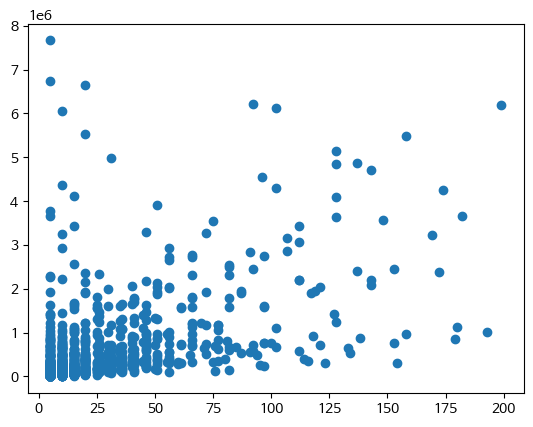

상관 계수 : 0.5344503919980428, p-value : 1.440706221656236e-85


In [298]:
# 상관관계 검정
## 20대의 카드이용건수와 카드이용금액계가 상관관계가 있는지 시각화
df1_20대 = df1[df1['연령대별(AGE)'] == '20대']
x = df1_20대['카드이용건수계(USECT_CORR)']
y = df1_20대['카드이용금액계(AMT_CORR)']
## 상관관계 분석
plt.scatter(x,y)
plt.show()
c_stat, p_val = stats.pearsonr(x,y)
print(f'상관 계수 : {c_stat}, p-value : {p_val}')

- 피어슨 상관분석을 통해 상관관계를 확인하였다.
- p-value가 매우 작기 때문에 귀무가설을 기각한다. 즉, 20대의 카드이용건수와 카드이용금액계는 상관관계가 있다.

In [299]:
# 인간관계 검정
## 20대의 카드이용건수와 카드이용금액계가 인과관계가 있는지 시각화
lr = LinearRegression()

X = x.values.reshape(-1,1)
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[15868.00265554]
157044.64225460746


- y = 15868x + 157045

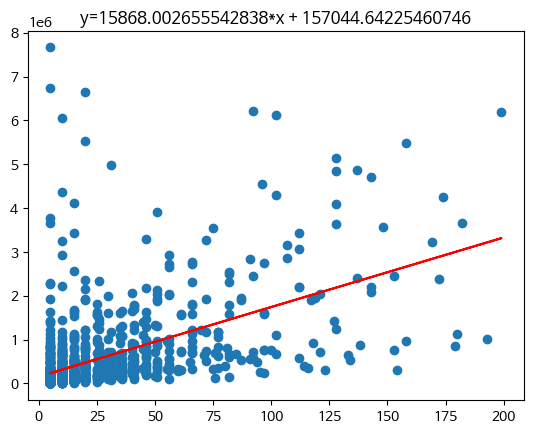

In [300]:
y2 = lr.coef_[0]*x +lr.intercept_
plt.scatter(x,y)
plt.plot(x, y2, color='red')
plt.title('y={}*x + {}'.format(lr.coef_[0], lr.intercept_))
plt.show()

In [301]:
## statsmodels.api.OLS 회귀분석 검정
import statsmodels.api as sm
results = sm.OLS(y, sm.add_constant(x)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      카드이용금액계(AMT_CORR)   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     457.0
Date:                Mon, 16 Oct 2023   Prob (F-statistic):           1.44e-85
Time:                        11:51:46   Log-Likelihood:                -17145.
No. Observations:                1145   AIC:                         3.429e+04
Df Residuals:                    1143   BIC:                         3.430e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.57e+05   2.89e+04      5.438      0.000       1e+05    2.14e+05
카드이용건수계(USECT_CORR)  1.587e+04    742.252     21.378      0.000    1.44e+04    1.73e+04
==============================================================================
Omnibus:                      986.561   Durbin-Watson:                   1.588
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31912.682
Skew:                           3.866   Prob(JB):                         0.00
Kurtosis:                      27.680   Cond. No.                         49.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- p-value 가 0.00 이므로 귀무가설을 기각한다. 즉, 20대의 카드이용건수와 카드이용금액계는 인과관계가 있다.
- R-squared 값이 0.286 이므로 회귀선의 설명력이 낮음을 알 수 있다.


In [302]:
results = sm.OLS(y, x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      카드이용금액계(AMT_CORR)   R-squared (uncentered):                   0.455
Model:                            OLS   Adj. R-squared (uncentered):              0.455
Method:                 Least Squares   F-statistic:                              956.4
Date:                Mon, 16 Oct 2023   Prob (F-statistic):                   4.09e-153
Time:                        11:51:46   Log-Likelihood:                         -17160.
No. Observations:                1145   AIC:                                  3.432e+04
Df Residuals:                    1144   BIC:                                  3.433e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
카드이용건수계(USECT_CORR)  1.835e+04    593.231     30.925      0.000    1.72e+04    1.95e+04
==============================================================================
Omnibus:                      939.759   Durbin-Watson:                   1.555
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30569.110
Skew:                           3.572   Prob(JB):                         0.00
Kurtosis:                      27.284   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""